In [ ]:
#Regression. In this exercise, we will use linear regression for estimating the number of
#hours a person would be absent from work given their available information. For this,
#we use the “absenteesim at work” dataset obtained from the UCI repository, which is
#attached to the assignment in Canvas. In the dataset, you will find information about
#individuals, such as their age, education, reasons for absence, etc., as well as the target
#variable, which is absenteesim time in hours.

In [1]:
# (a) How many data points does the dataset include? How many features does each
#data point have?
# 740 points and 21 features, one feature is ...

In [2]:
import csv
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import math

In [3]:
from numpy import genfromtxt
my_data = genfromtxt('Absenteeism_at_work.csv', delimiter=',')
my_data.shape

(741, 21)

In [4]:
#(b)Randomly split the data into train and test with the ratio 80/20, that is, use 80%
#of the data to fit the line, and the remaining 20% for testing, with the pre-specified
#random seed. Train a linear regression model on the training data. Then, use the
#trained model to estimate hours of absence in the test data. Report the average
#root mean squared error (RMSE) on the test data

In [5]:

train,test = train_test_split(my_data[1:,], test_size=0.2, random_state=1234)
train_data,train_target=train[:,:-1],train[:,-1]
test_data,test_target=test[:,:-1],test[:,-1]

In [6]:
my_regressor = linear_model.LinearRegression()
my_regressor.fit(train_data, train_target) 
train_test=my_regressor.predict(test_data)
temp=mean_squared_error(train_test, test_target)
math.sqrt(temp)

#train_test.shape

8.888348733585747

In [7]:
#(c) Perform 10-fold cross validation and report the RMSE obtained from each fold as
#well as their average.

In [16]:
from sklearn.cross_validation import KFold
from sklearn import cross_validation
train=my_data[1:,:-1]
target=my_data[1:,-1]
my_regressor = linear_model.LinearRegression()

my_regressor.fit(train_data, train_target) 
kf = KFold(n=740,n_folds =10, random_state=1234)
scores = cross_validation.cross_val_score(my_regressor, train, target, scoring='neg_mean_squared_error', cv=kf)
scores=-scores
scores

array([ 52.6535215 , 106.99624807, 100.42400282, 120.51991061,
       212.3547092 , 186.10522577, 176.35969023,  93.3585023 ,
       251.73773207, 295.15868934])

In [15]:
temp=scores.mean()
math.sqrt(temp)


12.631976218713023

In [216]:
#(d) How does the result in (b) compare to the result in (c)? Based on your analysis,
#does it suffice to avoid using cross-validation and simply train and test with a
#random split of the data? Interpret

In [217]:
# in (b) get less RMSE.Nope, as in simply train and test, it has a high probability of random, sometimes it maybe small
#but sometimes RMSE may become big, it is better to use cross-validation, which can reduce the random probability. 

In [218]:
#K Nearest Neighbors (KNN) Classification. Bob, our collaborator at Penn
#State Hershey Medical School is interested in predicting whether a cell is cancerous
#or not. Specifically, he is researching on the Breast Cancer dataset in which each cell
#is represented by a feature vector of its characteristics such as its size, etc., and is
#1
#classified as being benign, or malignant. Load the Breast Cancer dataset from sklearn
#datasets

In [219]:
#(a) How many data points does the dataset include? How many features does each
#data point have?
# 569 points, 30 features

In [113]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.data.shape


(569, 30)

In [114]:
data.target.shape

(569,)

In [126]:
#(b) Randomly split the data into train and test with the ratio 80/20, that is, use 80%
#of the data to fit the line, and the remaining 20% for testing, with the pre-specified
#random seed. Train a 5 nearest neighbor classifier on the training data. Then,
#use the trained model on the test data and report the area under the ROC curve
#(AUC)

In [139]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn import metrics
data_train,data_test,data_target,test_target = train_test_split(data.data,data.target, test_size=0.2, random_state=1234)
my_knn_regressor = KNeighborsRegressor(n_neighbors = 5)# 3 neighbors chosen arbitrarily
my_knn_regressor.fit(data_train, data_target) # train the local regressor
train_test= my_knn_regressor.predict(data_test)

fpr, tpr, thresholds = metrics.roc_curve(test_target,train_test)
metrics.auc(fpr, tpr)

0.9502415458937199

In [140]:
#(c) Perform 5-fold cross validation. Plot the ROC curve of each fold and compute
#the AUC of each fold. Then, report the average AUC of all 5 folds. Compare
#the obtained AUCs. Does it suffice to stick with the strategy in item (b), or is it
#more meaningful to perform cross validation? Please explain.

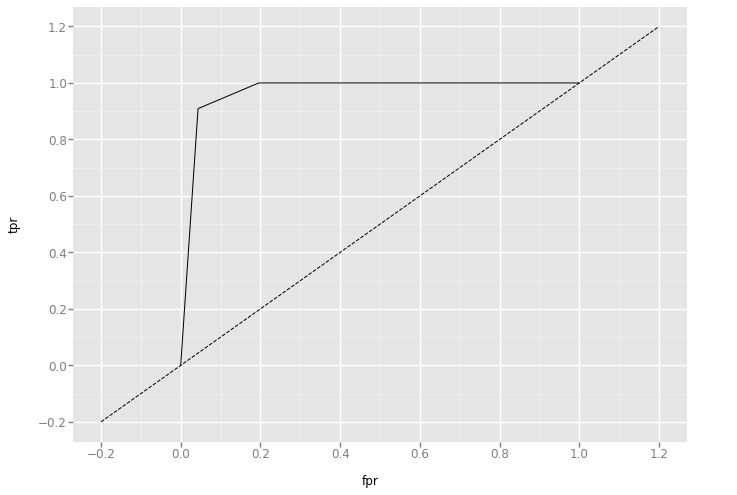

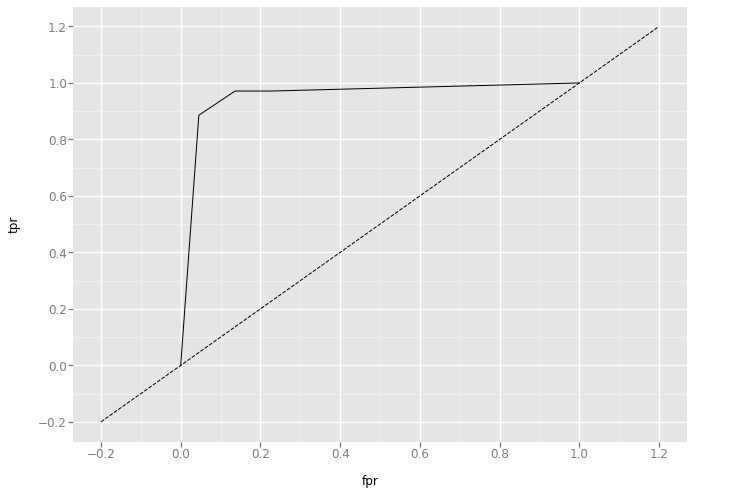

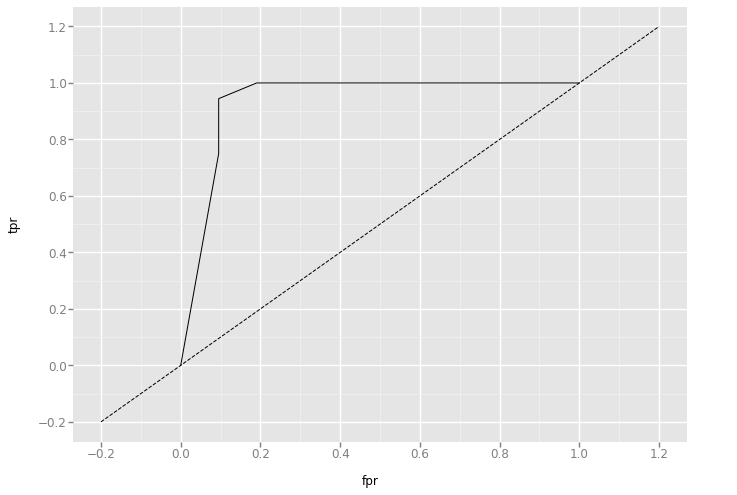

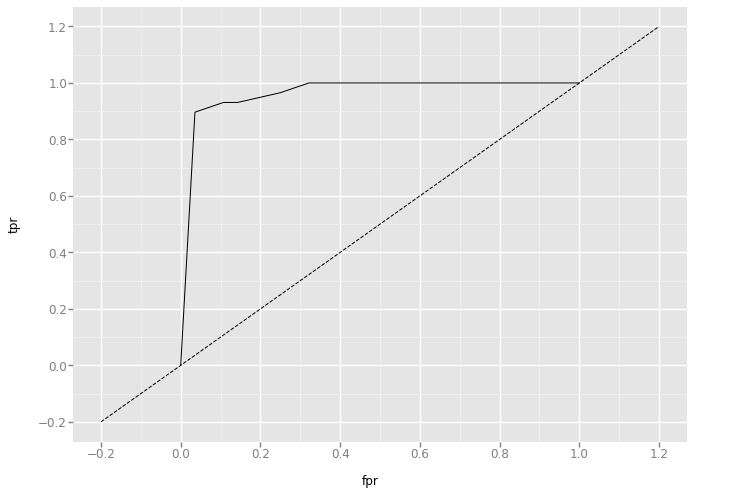

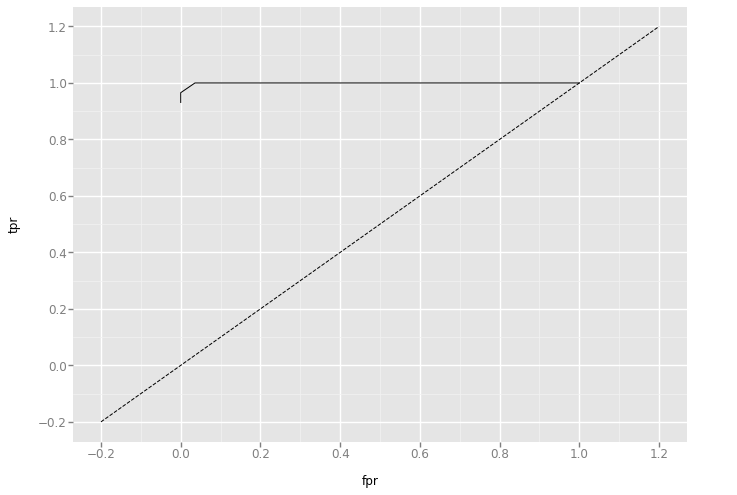

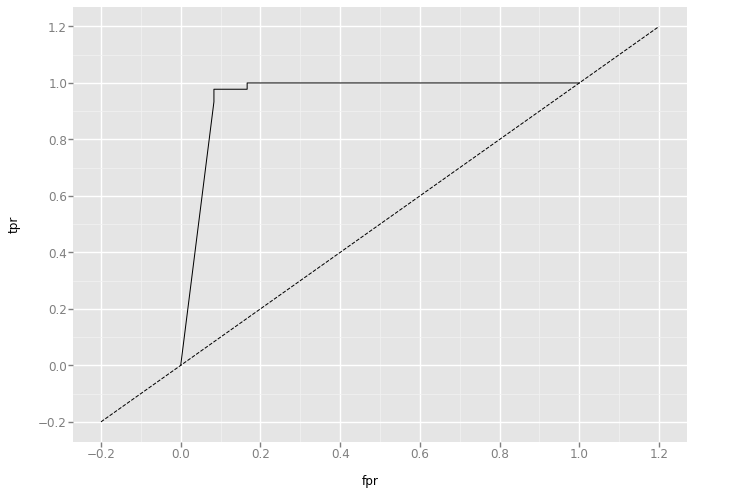

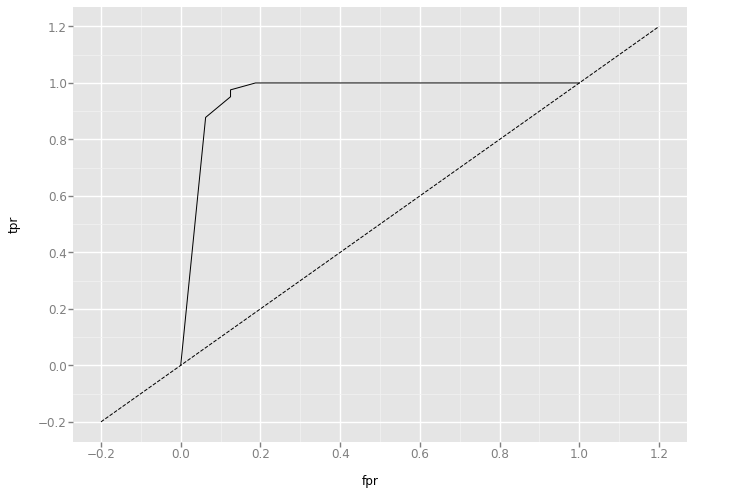

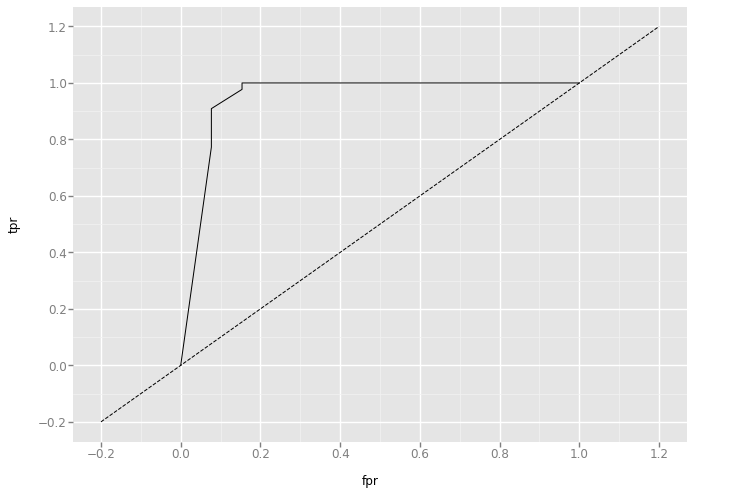

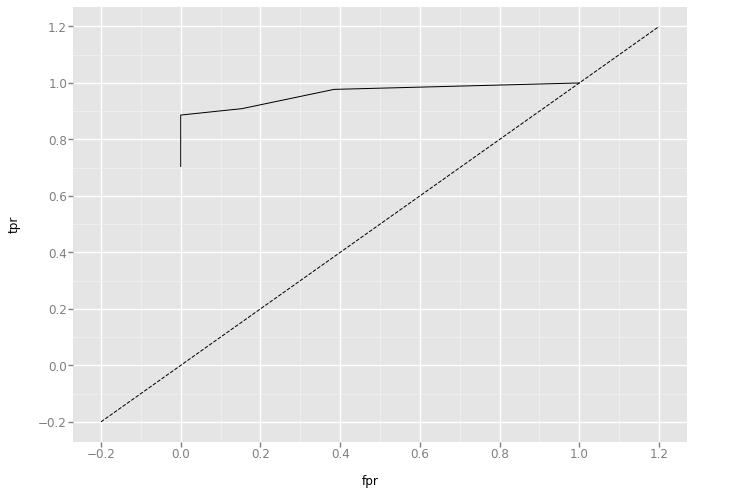

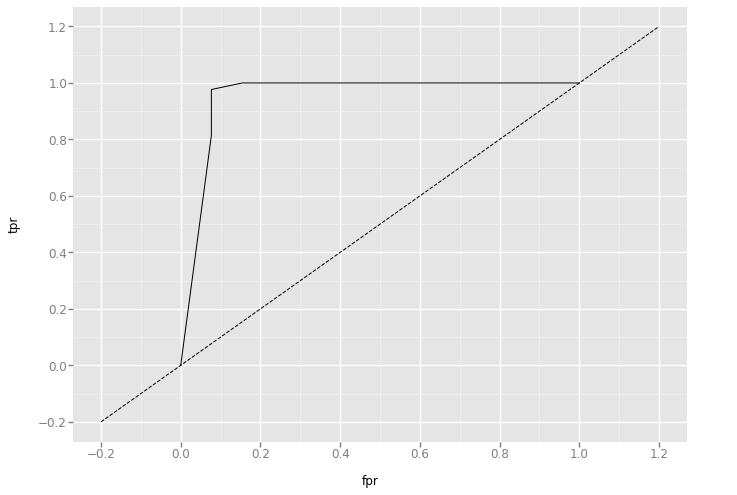

In [253]:
import matplotlib.pyplot as plt
import numpy as np
import ggplot
from ggplot import aes
import pandas as pd
from ggplot import *
kf = KFold(n_splits=10, random_state=1234)
for x,y in kf.split(data.data, data.target):
    my_knn_regressor = KNeighborsRegressor(n_neighbors = 5)# 3 neighbors chosen arbitrarily
    data_train,data_test,data_target,test_target = data.data[x,:],data.data[y,:],data.target[x],data.target[y]
    my_knn_regressor.fit(data_train, data_target) # train the local regressor
    train_test= my_knn_regressor.predict(data_test)

    fpr, tpr, thresholds = metrics.roc_curve(test_target,train_test)
    
    df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
    g=ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
    g.show()

In [235]:

my_knn_regressor = KNeighborsRegressor(n_neighbors = 5)
scores = cross_validation.cross_val_score(my_knn_regressor, data.data, data.target, scoring='roc_auc', cv=5,)
scores

array([0.94820972, 0.95290424, 0.98530405, 0.95212982, 0.96264368])

In [147]:
scores.mean()

0.9602383013895587

In [148]:
#more meaningful to perform cross validation, as it can avoid random

In [149]:
# 3. K Neighbors Regression. Return to the dataset in Problem 1. This time, we are
# interested in K neighbors regression instead of a regression on the whole dataset and we
# would like to analyze what would be reasonable number of neighbors and what distance
# to use based on the data. To do so, perform 10-fold cross validation. In each fold, fit a
# “weighted” linear regression in the following manner: For a given test data point, we
# would like to estimate its outcome based on its k ∈ {1, . . . , 10} nearest neighbors and
# a regression line weighted by the inverse of the distance of the neighbors of the test
# point. We would like to use the Minkowski distance with degree p ∈ {1, . . . , 10}. For
# each fold, report the k and p at which we obtain the lowest RMSE. Do you get the
# same k and p from each fold? If yes, what does this mean? If no, why not? Then,
# report the average RMSE across all folds. How different is this obtained RMSE than
# the one you obtained from Problem 1? Exp

In [194]:
train=my_data[1:,:-1]
target=my_data[1:,-1]



In [37]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
arr = []

for x in range(1,11,1):
    for y in range(1,11,1):
        neigh = KNeighborsRegressor(n_neighbors=x, weights='distance',p=y,metric='minkowski')
        kf = KFold(n=740,n_folds =10, random_state=1234)
        
        scores = cross_validation.cross_val_score(neigh, train, target, scoring='neg_mean_squared_error', cv=kf)
        arr.append(scores)

arr=np.array(arr)



In [38]:
arr

array([[ -51.28378378, -544.48648649, -134.64864865, -417.37837838,
         -96.35135135, -249.85135135, -238.7027027 , -273.71621622,
        -287.58108108, -520.        ],
       [-436.95945946, -283.16216216, -126.97297297, -499.71621622,
        -113.21621622, -250.54054054, -238.10810811, -276.86486486,
        -434.86486486, -496.54054054],
       [-436.87837838, -283.56756757, -122.89189189, -489.7972973 ,
        -117.08108108, -255.91891892, -238.10810811, -275.66216216,
        -433.54054054, -336.71621622],
       [-442.27027027, -134.43243243, -122.89189189, -567.16216216,
        -116.64864865, -424.06756757, -237.89189189, -274.17567568,
        -437.05405405, -335.60810811],
       [-463.66216216, -134.43243243, -122.89189189, -567.18918919,
        -117.98648649, -427.24324324, -237.89189189, -274.51351351,
        -437.16216216, -337.39189189],
       [-754.48648649, -134.77027027, -122.89189189, -567.18918919,
        -118.66216216, -427.33783784, -237.91891892, -274

In [39]:
arr.shape

(100, 10)

In [40]:
row_index = arr.argmax(axis=0)
row_index

array([ 0,  6, 90, 91,  0, 95, 30, 16, 10, 60])

In [41]:
for x in row_index:
    print("[k","p] :",[x//10+1,x%10+1])

[k p] : [1, 1]
[k p] : [1, 7]
[k p] : [10, 1]
[k p] : [10, 2]
[k p] : [1, 1]
[k p] : [10, 6]
[k p] : [4, 1]
[k p] : [2, 7]
[k p] : [2, 1]
[k p] : [7, 1]


In [42]:
math.sqrt(-np.mean(arr))

14.419470824849684

In [24]:
#RMSE becomes larger, as we use a weighted linear regression, which can fit the model better, but the RMSE increases not 
# as expected, which means the dataset fits linear regression better than knn regression

In [ ]:
# different k and p, but k focuese on 1, 10 and 2, n focuese on 1,7. the cross valiation may divide the dataset into 
#different part and for different part they have different k and p